Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

Age of primary beneficiary

Gender of primary beneficiary (only female, male recorded)

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

Whether the beneficiary smokes

The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

Read in the dataset, and display some summaries of the data.

Fix any concerns you have about the data.

Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from plotnine import *
from re import X
import plotnine as p9
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
insurance = pd.read_csv("https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1")
insurance

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692
...,...,...,...,...,...,...
426,23,female,33.400,no,southwest,10795.93733
427,18,female,31.920,no,northeast,2205.98080
428,18,female,36.850,no,southeast,1629.83350
429,21,female,25.800,no,southwest,2007.94500


In [ ]:
# Normalize charges
columns_to_normalize = ['charges']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the selected columns
insurance["charges_norm"] = scaler.fit_transform(insurance[columns_to_normalize])


#Dummifying sex, smoker & region

mylist = ['smoker', 'region', 'sex']


insurance_dummified = pd.get_dummies(insurance, columns = mylist)
insurance_dummified

,age,bmi,charges,charges_norm,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,16884.92400,0.291709,0,1,0,0,0,1,1,0
1,33,22.705,21984.47061,0.386138,1,0,0,1,0,0,0,1
2,32,28.880,3866.85520,0.050651,1,0,0,1,0,0,0,1
3,31,25.740,3756.62160,0.048610,1,0,0,0,1,0,1,0
4,60,25.840,28923.13692,0.514623,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,0.178958,1,0,0,0,0,1,1,0
427,18,31.920,2205.98080,0.019896,1,0,1,0,0,0,1,0
428,18,36.850,1629.83350,0.009228,1,0,0,0,1,0,1,0
429,21,25.800,2007.94500,0.016229,1,0,0,0,0,1,1,0


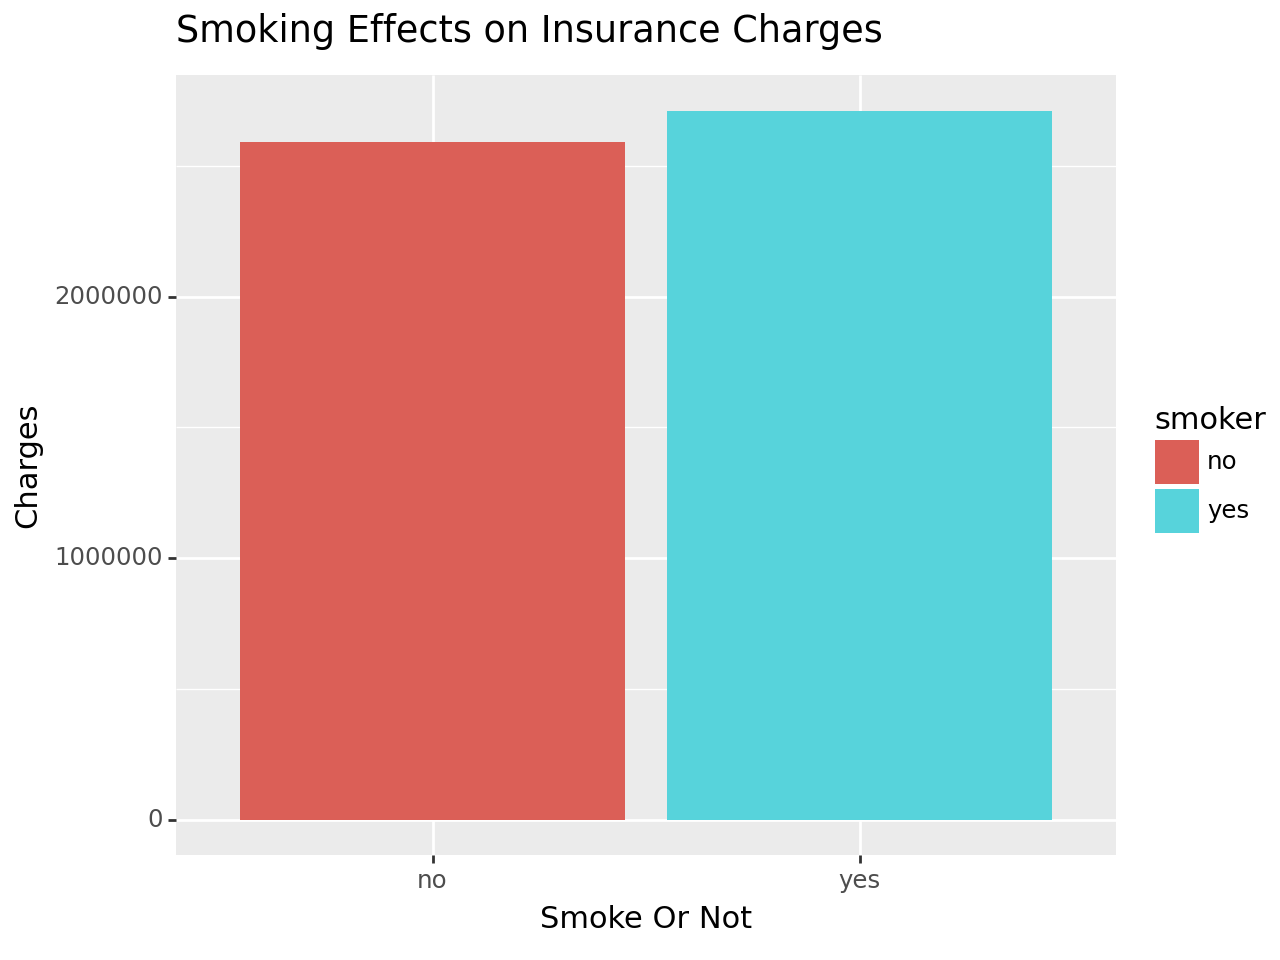

<Figure Size: (640 x 480)>

In [ ]:
plot1 = (ggplot(insurance, aes(x = "smoker", y = "charges", fill = "smoker"))
  +geom_bar(stat='identity')
  +ggtitle("Smoking Effects on Insurance Charges")
  +xlab("Smoke Or Not")
  +ylab("Charges")
  )

plot1

In this plot, we can see that whether or not the person smoke or not has little impact on the insurance charges. We can see that for smokers, the charges is a bit higher.

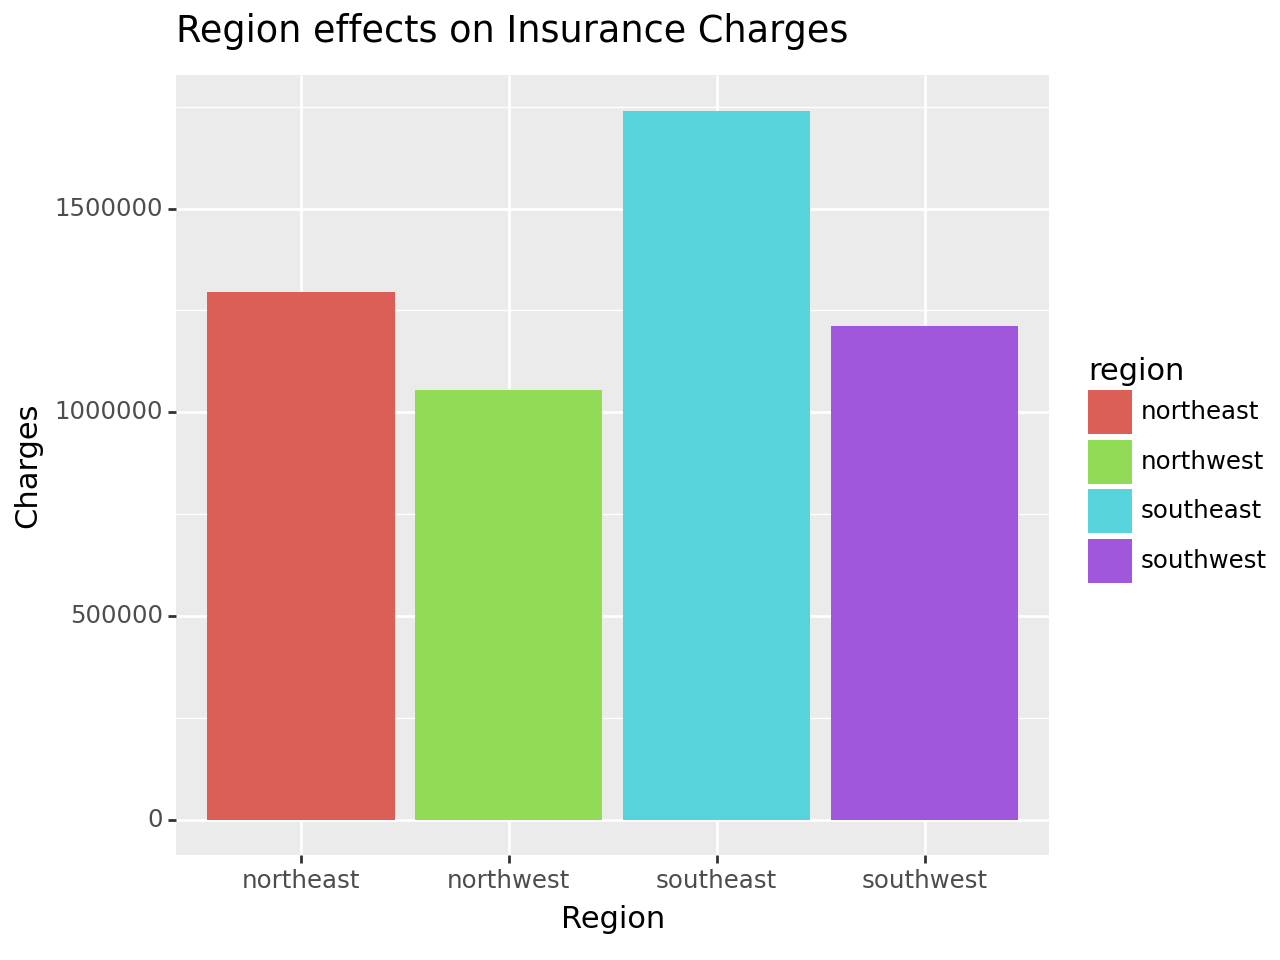

<Figure Size: (640 x 480)>

In [ ]:
plot2 = (ggplot(insurance, aes(x = "region", y = "charges", fill = "region"))
  +geom_bar(stat='identity')
  +ggtitle("Region effects on Insurance Charges")
  +xlab("Region")
  +ylab("Charges")
  )

plot2

In this plot, we can see that the location of the insurance holder matters when it comes to predicting insurance charges. As we can see, charges is highest for insurance holders located in the Southeast and is the lowest for insurance holders located in the Northwest.

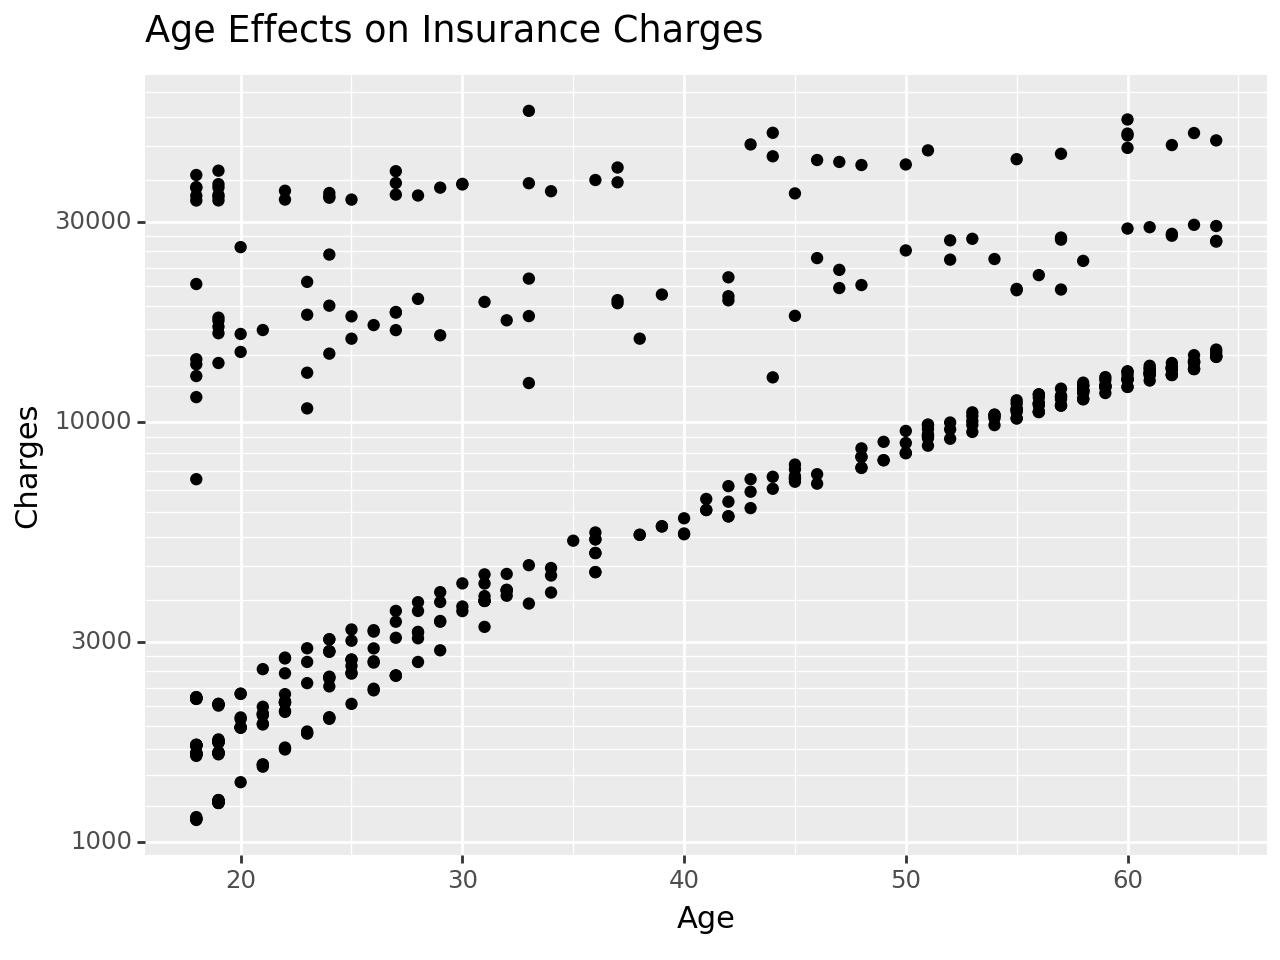

<Figure Size: (640 x 480)>

In [ ]:
plot3 = (ggplot(insurance, aes( x='age', y='charges'))
   +geom_point()
   +scale_y_log10()
   +ggtitle("Age Effects on Insurance Charges")
   +xlab("Age")
   +ylab("Charges")
   )

plot3

In this plot, we can see that age is a good predictor for the insurance charges. By plotting Age against Insurance Charges, we can see that Charges increase the more age an insurance holder has. Even the outliers for each policy holder age increases significantly as age increases.

Part Two: Simple Linear Models
Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

Make a model that also incorporates the variable sex. Report your results.

Now make a model that does not include sex, but does include smoker. Report your results.

Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [ ]:
#Model 1

y1 = insurance_dummified['charges_norm']
X1 = insurance_dummified[["age"]]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25)

lr = LinearRegression()

Model1 = lr.fit(X_train1, y_train1)
y_pred_lr1 = Model1.predict(X_test1)
print(mean_squared_error(y_test1, y_pred_lr1))
print(Model1.coef_)
r_squared_1 = r2_score(y_test1, y_pred_lr1)
r_squared_1



0.0439171094333711
[0.00406527]


0.11289828928208279

In [ ]:
#Model 2

y2 = insurance_dummified['charges_norm']
X2 = insurance_dummified[["age", "sex_female"]]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25)

lr = LinearRegression()

Model2 = lr.fit(X_train2, y_train2)
y_pred_lr2 = Model2.predict(X_test2)
print(mean_squared_error(y_test2, y_pred_lr2))
print(Model2.coef_)
r_squared_2 = r2_score(y_test2, y_pred_lr2)
r_squared_2


0.04044864199839199
[ 0.00443366 -0.02398508]


0.05572179632105967

In [ ]:
#Model 3

y3 = insurance_dummified['charges_norm']
X3 = insurance_dummified[["age", "smoker_yes"]]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25)

lr = LinearRegression()

Model3 = lr.fit(X_train3, y_train3)
y_pred_lr3 = Model3.predict(X_test3)
print(mean_squared_error(y_test3, y_pred_lr3))
print(Model3.coef_)
r_squared_3 = r2_score(y_test3, y_pred_lr3)
r_squared_3

0.013144552176578452
[0.00472046 0.47090189]


0.6842896545744445

Since there are a lot of variations in the Charges variable, I have normalized it using sklearn's min-max normalizer. Then, I used the normalized values of Charges to be the dependent variable. With that, model 3 with the smoker_yes dummy variable as the predictor seems to perform better than model 2, which uses sex_female dummy variable as the predictor.

Model 3 is better than model 2 because:

Lower MSE: 0.0106 vs 0.05, respectively.
Higher R-squared: 0.8 vs 0.028, respectively.

Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

In [ ]:
#Model 4

y4 = insurance_dummified['charges_norm']
X4 = insurance_dummified[["age", "bmi"]]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)

lr = LinearRegression()

Model4 = lr.fit(X_train4, y_train4)
y_pred_lr4 = Model4.predict(X_test4)
print(mean_squared_error(y_test4, y_pred_lr4))
print(Model4.coef_)
r_squared_4 = r2_score(y_test4, y_pred_lr4)
r_squared_4

0.04330375265428022
[0.00388377 0.00450724]


0.15576029473874298

Model4, the model that uses BMI and Age as predictor is almost comparable to Model1, the model in Part 2, Question 1.

MSE for Model 1: 0.0439
MSE for Model 4: 0.0433

R-squared for Model 1: 0.113
R-squared for Model 2: 0.155

So based on the MSE and R-squared, Model 4 is the slightly better model.


In [ ]:
insurance_dummified["age squared"] = insurance_dummified["age"] ** 2
insurance_dummified["age 4th"] = insurance_dummified["age"] ** 4
insurance_dummified["age 12th"] = insurance_dummified["age"] ** 12

insurance_dummified

,age,bmi,charges,charges_norm,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age squared,age 4th,age 12th
0,19,27.900,16884.92400,0.291709,0,1,0,0,0,1,1,0,361,130321,2213314919066161
1,33,22.705,21984.47061,0.386138,1,0,0,1,0,0,0,1,1089,1185921,1667889514952984961
2,32,28.880,3866.85520,0.050651,1,0,0,1,0,0,0,1,1024,1048576,1152921504606846976
3,31,25.740,3756.62160,0.048610,1,0,0,0,1,0,1,0,961,923521,787662783788549761
4,60,25.840,28923.13692,0.514623,1,0,0,1,0,0,1,0,3600,12960000,66535302272909312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,23,33.400,10795.93733,0.178958,1,0,0,0,0,1,1,0,529,279841,21914624432020321
427,18,31.920,2205.98080,0.019896,1,0,1,0,0,0,1,0,324,104976,1156831381426176
428,18,36.850,1629.83350,0.009228,1,0,0,0,1,0,1,0,324,104976,1156831381426176
429,21,25.800,2007.94500,0.016229,1,0,0,0,0,1,1,0,441,194481,7355827511386641


In [ ]:
#Model 5

y5 = insurance_dummified['charges_norm']
X5 = insurance_dummified[["age", "age squared"]]

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25)

lr = LinearRegression()

Model5 = lr.fit(X_train5, y_train5)
y_pred_lr5 = Model5.predict(X_test5)
print(mean_squared_error(y_test5, y_pred_lr5))
print(Model5.coef_)
r_squared_5 = r2_score(y_test5, y_pred_lr5)
r_squared_5

0.03662157335190732
[ 8.70955726e-03 -5.74103245e-05]


0.09186912735874897

In [ ]:
#Model 6

y6 = insurance_dummified['charges_norm']
X6 = insurance_dummified[["age", "age 4th"]]

X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.25)

lr = LinearRegression()

Model6 = lr.fit(X_train6, y_train6)
y_pred_lr6 = Model6.predict(X_test6)
print(mean_squared_error(y_test6, y_pred_lr6))
print(Model6.coef_)
r_squared_6 = r2_score(y_test6, y_pred_lr6)
r_squared_6

0.04816605224604948
[ 4.47479086e-03 -2.92570259e-09]


0.14461042225888399

In [ ]:
#Model 7

y7 = insurance_dummified['charges_norm']
X7 = insurance_dummified[["age", "age 12th"]]

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.25)

lr = LinearRegression()

Model7 = lr.fit(X_train7, y_train7)
y_pred_lr7 = Model7.predict(X_test7)
print(mean_squared_error(y_test7, y_pred_lr7))
print(Model7.coef_)
r_squared_7 = r2_score(y_test7, y_pred_lr7)
r_squared_7

0.05376466147603988
[ 1.84832032e-39 -1.42277174e-21]


-0.002640053086198302

Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

Consider the following possible models:

Only age as a predictor.

age and bmi as a predictor.

age, bmi, and smoker as predictors (no interaction terms)

age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)

age, bmi, and smokeras predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions. Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

In [ ]:
insurance_new = pd.read_csv("https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1")
insurance_new

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790
...,...,...,...,...,...,...
138,19,male,34.900,yes,southwest,34828.65400
139,45,male,30.360,yes,southeast,62592.87309
140,43,male,27.800,yes,southwest,37829.72420
141,24,female,27.720,no,southeast,2464.61880


In [ ]:
# Normalize charges
columns_to_normalize = ['charges']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the selected columns
insurance_new["charges_norm"] = scaler.fit_transform(insurance_new[columns_to_normalize])


#Dummifying sex, smoker & region

mylist = ['smoker', 'region', 'sex']


insurance_new_dummified = pd.get_dummies(insurance_new, columns = mylist)
insurance_new_dummified

,age,bmi,charges,charges_norm,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,23,34.400,1826.84300,0.011253,1,0,0,0,0,1,0,1
1,56,40.300,10602.38500,0.151328,1,0,0,0,0,1,0,1
2,18,34.100,1137.01100,0.000242,1,0,0,0,1,0,0,1
3,63,23.085,14451.83515,0.212774,1,0,1,0,0,0,1,0
4,63,28.310,13770.09790,0.201892,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
138,19,34.900,34828.65400,0.538030,0,1,0,0,0,1,0,1
139,45,30.360,62592.87309,0.981204,0,1,0,0,1,0,0,1
140,43,27.800,37829.72420,0.585933,0,1,0,0,0,1,0,1
141,24,27.720,2464.61880,0.021433,1,0,0,0,1,0,1,0


In [ ]:
#Model 8

y8 = insurance_dummified['charges_norm']
X8 = insurance_dummified[["age", "bmi"]]

y_8_new = insurance_new_dummified['charges_norm']
X_8_new = insurance_new_dummified[["age", "bmi"]]

lr = LinearRegression()

Model8 = lr.fit(X8, y8)
y_pred_lr8 = Model8.predict(X_8_new)
print(mean_squared_error(y_8_new, y_pred_lr8))
print(Model8.coef_)
r_squared_8 = r2_score(y_8_new, y_pred_lr8)
r_squared_8

0.034355086764289694
[0.00400522 0.00524414]


0.13035531045536253

In [ ]:
#Model 9

y9 = insurance_dummified['charges_norm']
X9 = insurance_dummified[["age", "bmi", "smoker_yes"]]

y_9_new = insurance_new_dummified['charges_norm']
X_9_new = insurance_new_dummified[["age", "bmi", "smoker_yes"]]

lr = LinearRegression()

Model9 = lr.fit(X9, y9)
y_pred_lr9 = Model9.predict(X_9_new)
print(mean_squared_error(y_9_new, y_pred_lr9))
print(Model9.coef_)
r_squared_9 = r2_score(y_9_new, y_pred_lr9)
r_squared_9

0.009691530547307257
[0.00445749 0.00520923 0.44522396]


0.7546742311596766

In [ ]:
#Model 10

insurance_dummified['age*smoker'] = insurance_dummified["age"] * insurance_dummified["smoker_yes"]
insurance_dummified['bmi*smoker'] = insurance_dummified["bmi"] * insurance_dummified["smoker_yes"]
insurance_new_dummified['age*smoker'] = insurance_new_dummified["age"] * insurance_new_dummified["smoker_yes"]
insurance_new_dummified['bmi*smoker'] = insurance_new_dummified["bmi"] * insurance_new_dummified["smoker_yes"]

y10 = insurance_dummified['charges_norm']
X10 = insurance_dummified[["age", "bmi", "age*smoker", "bmi*smoker"]]

y10_new = insurance_new_dummified['charges_norm']
X10_new = insurance_new_dummified[["age", "bmi", "age*smoker", "bmi*smoker"]]


lr = LinearRegression()

Model10 = lr.fit(X10, y10)
y_pred_lr10 = Model10.predict(X10_new)
print(mean_squared_error(y10_new, y_pred_lr10))
print(Model10.coef_)
r_squared_10 = r2_score(y10_new, y_pred_lr10)
r_squared_10

0.0069057875355301316
[ 0.00500673  0.00187918 -0.00190951  0.01716511]


0.8251909099050854

In [ ]:
#Model 10

insurance_dummified['age*smoker'] = insurance_dummified["age"] * insurance_dummified["smoker_yes"]
insurance_dummified['bmi*smoker'] = insurance_dummified["bmi"] * insurance_dummified["smoker_yes"]
insurance_new_dummified['age*smoker'] = insurance_new_dummified["age"] * insurance_new_dummified["smoker_yes"]
insurance_new_dummified['bmi*smoker'] = insurance_new_dummified["bmi"] * insurance_new_dummified["smoker_yes"]

y10 = insurance_dummified['charges_norm']
X10 = insurance_dummified[["age", "bmi", "age*smoker", "bmi*smoker"]]

y10_new = insurance_new_dummified['charges_norm']
X10_new = insurance_new_dummified[["age", "bmi", "age*smoker", "bmi*smoker"]]


lr = LinearRegression()

Model10 = lr.fit(X10, y10)
y_pred_lr10 = Model10.predict(X10_new)
print(mean_squared_error(y10_new, y_pred_lr10))
print(Model10.coef_)
r_squared_10 = r2_score(y10_new, y_pred_lr10)
r_squared_10

0.0069057875355301316
[ 0.00500673  0.00187918 -0.00190951  0.01716511]


0.8251909099050854

In [ ]:
#Model 11

insurance_dummified['(age+bmi)*smoker'] = (insurance_dummified["age"] + insurance_dummified["bmi"]) * insurance_dummified["smoker_yes"]

insurance_new_dummified['(age+bmi)*smoker'] = (insurance_new_dummified["age"] + insurance_new_dummified["bmi"]) * insurance_new_dummified["smoker_yes"]


y11 = insurance_dummified['charges_norm']
X11 = insurance_dummified[["age", "bmi", "(age+bmi)*smoker"]]

y11_new = insurance_new_dummified['charges_norm']
X11_new = insurance_new_dummified[["age", "bmi", "(age+bmi)*smoker"]]


lr = LinearRegression()

Model11 = lr.fit(X11, y11)
y_pred_lr11 = Model11.predict(X11_new)
print(mean_squared_error(y11_new, y_pred_lr11))
print(Model11.coef_)
r_squared_11 = r2_score(y11_new, y_pred_lr11)
r_squared_11

0.009033547099223202
[0.00329719 0.00449958 0.00637896]


0.7713300415600552

Based on R-squared and Standard Error, Model10 turns out to be the best model.

In [ ]:
y_resid = y10_new - y_pred_lr10

scatter_data = pd.DataFrame({'y': y10_new, 'y_resid': y_resid})

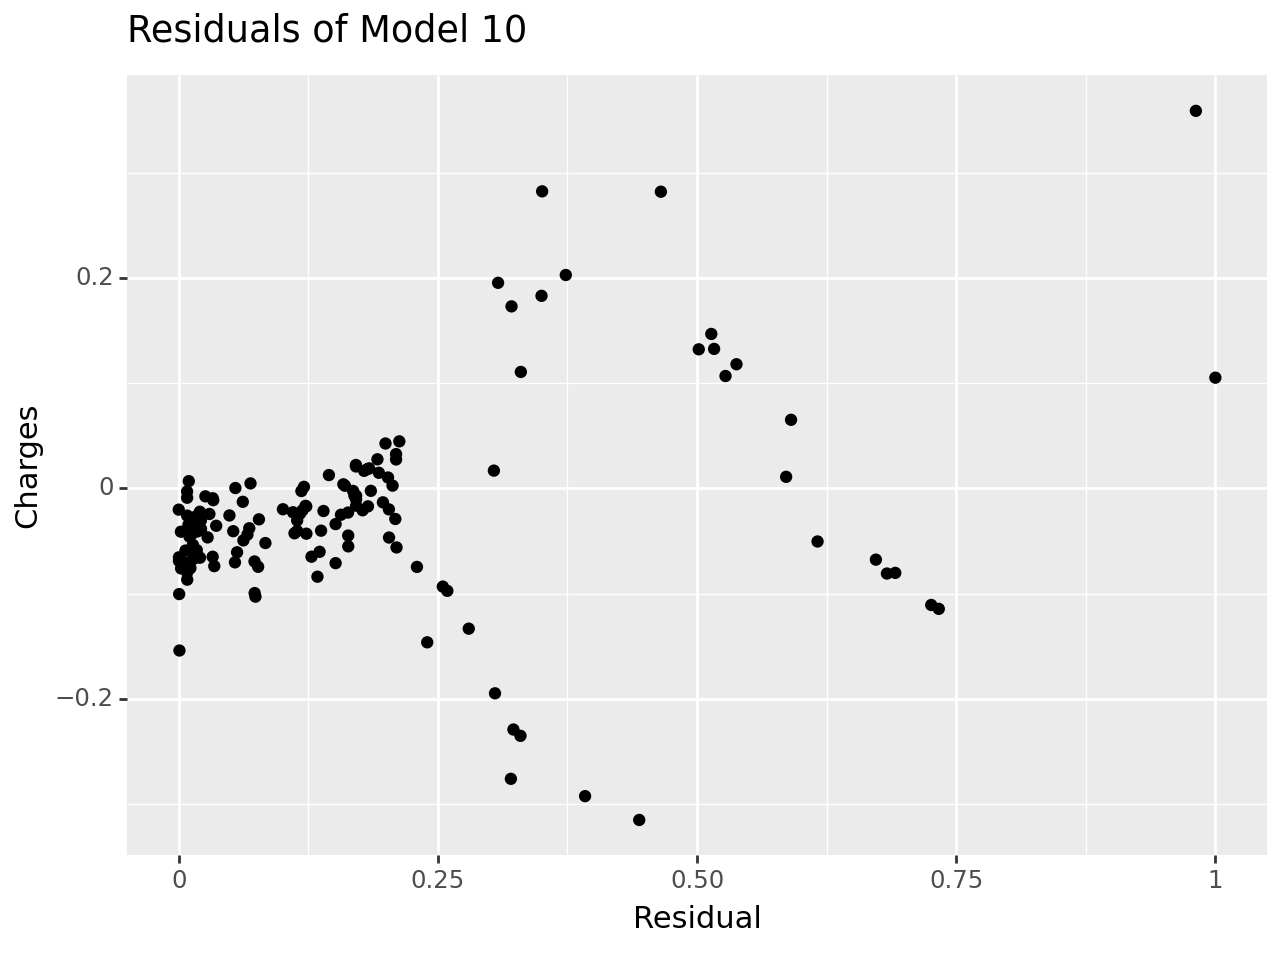

<Figure Size: (640 x 480)>

In [ ]:
plot4 = (ggplot(scatter_data, aes( x='y', y='y_resid'))
   +geom_point()
   +ggtitle("Residuals of Model 10")
   +xlab("Residual")
   +ylab("Charges")
   )

plot4

Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.

In [ ]:
#Model 12


y12 = insurance_dummified['charges_norm']
X12 = insurance_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "region_northeast", "region_northwest", "region_southeast"]]

y12_new = insurance_new_dummified['charges_norm']
X12_new = insurance_new_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "region_northeast", "region_northwest", "region_southeast"]]


lr = LinearRegression()

Model12 = lr.fit(X12, y12)
y_pred_lr12 = Model12.predict(X12_new)
print(mean_squared_error(y12_new, y_pred_lr12))
print(Model12.coef_)
r_squared_12 = r2_score(y12_new, y_pred_lr12)
r_squared_12

0.007079503626703598
[ 0.00499899  0.00209214 -0.00195119  0.01724857  0.01780778  0.00838399
 -0.00023984]


0.8207935617856073

In [ ]:
#Model 13


y13 = insurance_dummified['charges_norm']
X13 = insurance_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "sex_female"]]

y13_new = insurance_new_dummified['charges_norm']
X13_new = insurance_new_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "sex_female"]]


lr = LinearRegression()

Model13 = lr.fit(X13, y13)
y_pred_lr13 = Model13.predict(X13_new)
print(mean_squared_error(y13_new, y_pred_lr13))
print(Model13.coef_)
r_squared_13 = r2_score(y13_new, y_pred_lr13)
r_squared_13

0.006938418803434171
[ 0.0050154   0.00185577 -0.00192405  0.01719853  0.00759983]


0.8243649009638023

In [ ]:
#Model 14


y14 = insurance_dummified['charges_norm']
X14 = insurance_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "(age+bmi)*smoker"]]

y14_new = insurance_new_dummified['charges_norm']
X14_new = insurance_new_dummified[["age", "bmi", "age*smoker", "bmi*smoker", "(age+bmi)*smoker"]]


lr = LinearRegression()

Model14 = lr.fit(X14, y14)
y_pred_lr14 = Model14.predict(X14_new)
print(mean_squared_error(y14_new, y_pred_lr14))
print(Model14.coef_)
r_squared_14 = r2_score(y14_new, y_pred_lr14)
r_squared_14

0.006905787535530125
[ 0.00500673  0.00187918 -0.00699471  0.01207991  0.0050852 ]


0.8251909099050855

Model 14 is the best model based on the R-squared and Standard Error.

In [ ]:
y_resid = y14_new - y_pred_lr14

scatter_data = pd.DataFrame({'y': y14_new, 'y_resid': y_resid})

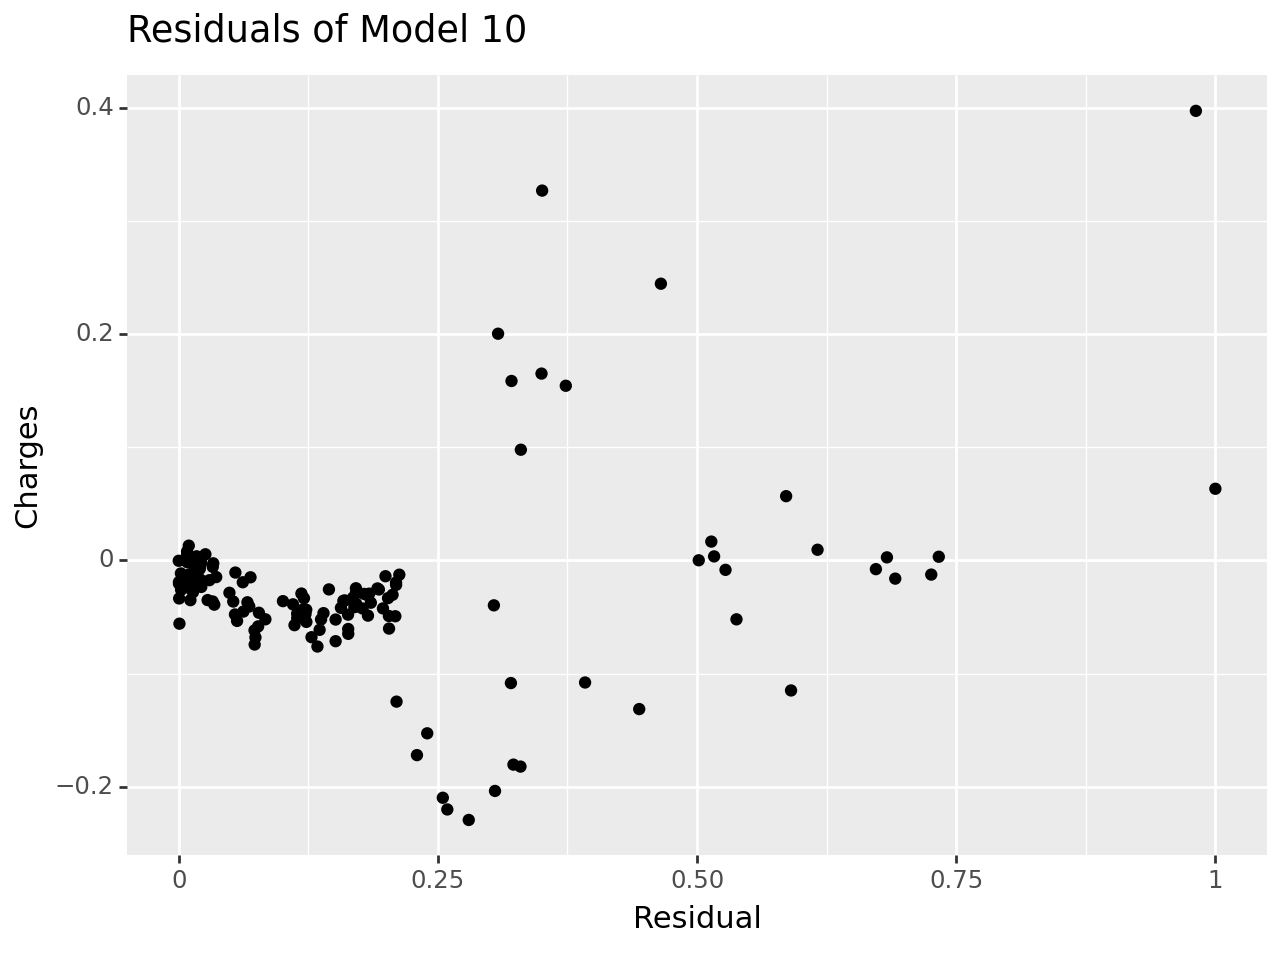

<Figure Size: (640 x 480)>

In [24]:
plot5 = (ggplot(scatter_data, aes( x='y', y='y_resid'))
   +geom_point()
   +ggtitle("Residuals of Model 10")
   +xlab("Residual")
   +ylab("Charges")
   )

plot5